In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


ModuleNotFoundError: No module named 'pandas'

In [ ]:
df1 = pd.read_csv('2008/Earning2008.csv')
df2 = pd.read_csv('2008/employePopn2008.csv')
df3 = pd.read_csv('2008/workinghr2008.csv')

In [ ]:
merged_df = df1.merge(df2,on='Occupation',suffixes=('_ear','_pop'))
merged_df = merged_df.merge(df3, on='Occupation',suffixes=('','_wor'))
merged_df.columns = ['Occupation', 'total_ear', 'male_ear', 'female_ear',
                     'total_pop', 'male_pop', 'female_pop',
                     'total_wor', 'male_wor', 'female_wor']
merged_df.set_index('Occupation',inplace=True)

In [ ]:
merged_df

,total_ear,male_ear,female_ear,total_pop,male_pop,female_pop,total_wor,male_wor,female_wor
Occupation,,,,,,,,,
Total,5117,5721,3402,100.0,100.0,100.0,38.7,43.1,34.8
Legislators senior officials,16142,16888,12313,0.6,1.1,0.2,55.1,55.2,54.5
Professionals,9484,10468,6478,1.7,2.8,0.8,42.0,42.4,41.0
Technicians,6001,6878,4649,2.0,2.7,1.3,43.5,45.4,39.9
Clerks,7243,7566,5630,1.0,1.8,0.3,46.1,46.5,44.5
Service workers,6246,6747,4251,7.3,9.3,5.5,52.1,55.2,47.6
Agriculture workers,4554,4847,2472,3.1,2.7,3.5,36.2,42.2,32.0
Craft & related trades,5186,5390,3520,8.4,11.6,5.5,40.8,49.5,24.6
Plant & machine operators,6248,6211,6928,1.4,2.7,0.2,58.6,59.3,48.0


In [ ]:
merged_df['total_ear'][0]

C:\Users\anist\AppData\Local\Temp\ipykernel_20344\3826416858.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  merged_df['total_ear'][0]


np.int64(5117)

In [ ]:


def minMax_normalize(df, columns):
    normalized_df = df.copy()
    for column in columns:
        min_value = df[column].min()
        max_value = df[column].max()
        
        normalized_df[column] = (df[column] - min_value) / (max_value - min_value)
    return normalized_df

col_to_normalize = ['total_ear', 'total_pop', 'total_wor', 'female_pop', 'male_pop']
normalized_df = minMax_normalize(merged_df.drop('Total', axis=0), col_to_normalize)
radar_df = normalized_df[col_to_normalize].head()


In [ ]:
radar_df

,total_ear,total_pop,total_wor,female_pop,male_pop
Occupation,,,,,
Legislators senior officials,1.000000,0.048077,0.843750,0.021978,0.082645
Professionals,0.492143,0.153846,0.258929,0.087912,0.223140
Technicians,0.226468,0.182692,0.325893,0.142857,0.214876
Clerks,0.321205,0.086538,0.441964,0.032967,0.140496
Service workers,0.245156,0.692308,0.709821,0.604396,0.760331


C:\Users\anist\AppData\Local\Temp\ipykernel_20344\948919350.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = [radar_df['total_ear'][row], radar_df['total_pop'][row], radar_df['total_wor'][row], radar_df['female_pop'][row], radar_df['male_pop'][row]]  # Scores out of 110


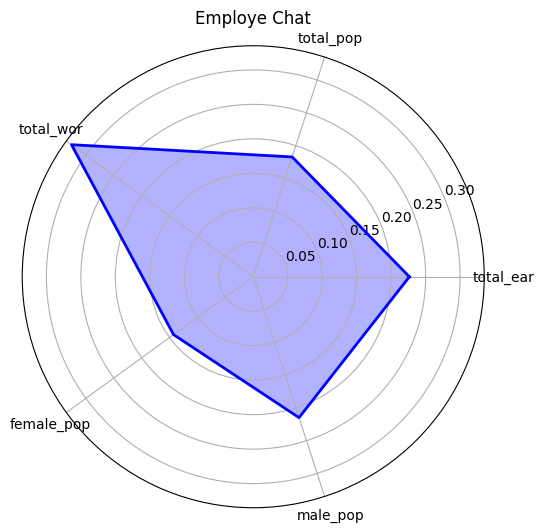

In [ ]:
# Sample Data (values for each attribute)
labels = ["total_ear",	"total_pop",	"total_wor",	"female_pop",	"male_pop"]
row = 2
values = [radar_df['total_ear'][row], radar_df['total_pop'][row], radar_df['total_wor'][row], radar_df['female_pop'][row], radar_df['male_pop'][row]]  # Scores out of 110

# Convert to radians for the radar chart
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# Close the shape by repeating first value
values += values[:1]
angles += angles[:1]

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.3)  # Fill area
ax.plot(angles, values, color='blue', linewidth=2)  # Border line
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Show the plot
plt.title("Employe Chat")
plt.show()
